In [1]:
library(ggplot2)

Want to understand how all the pieces fit together? Read R for Data Science: https://r4ds.hadley.nz/


In [158]:
dat = read.csv("datasets/butterflies.csv")
names(dat)

[1] "LarvalID"        "LarvalHost"      "Sex"             "MaternalHost"    "MotherID"        "DevelopmentTime" "AdultWeight"     "GrowthRate"     

In [159]:
dat$MaternalHost = paste0(dat$MaternalHost, "M")
dat$LarvalHost = paste0(dat$LarvalHost, "L")
means = tapply(dat$DevelopmentTime, list(dat$MaternalHost, dat$LarvalHost), mean)
means

          BarbareaL BerteroaL
BarbareaM  21.69608  27.00000
BerteroaM  23.51282  31.01923

In [160]:
dat$LarvalHost <- factor(dat$LarvalHost)
dat$MaternalHost <- factor(dat$MaternalHost)

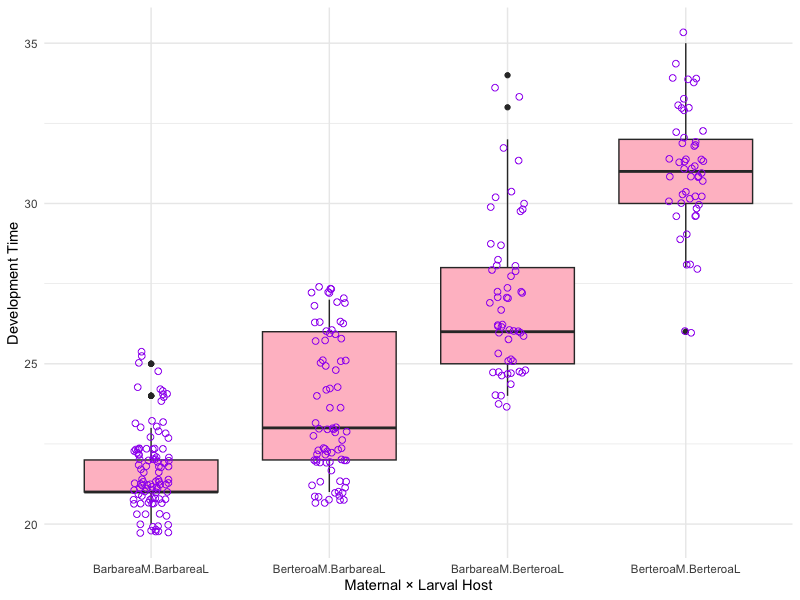

In [ ]:
set.seed(8)
ggplot(dat, aes(x=interaction(MaternalHost, LarvalHost), y=DevelopmentTime)) +
  geom_boxplot(fill="pink") +
  geom_jitter(width=0.1, shape=1, color="purple", size=2) +
  xlab("Maternal × Larval Host") +
  ylab("Development Time") +
  theme_minimal()

In [ ]:
model_dev_time = lm(DevelopmentTime ~ LarvalHost * MaternalHost, data=dat)

# sum sq measures between-group variation due to that variable
# for residuals, it measures within-group variation

anova(model_dev_time)

Analysis of Variance Table

Response: DevelopmentTime
                         Df  Sum Sq Mean Sq F value    Pr(>F)    
LarvalHost                1 2809.15 2809.15  801.36 < 2.2e-16 ***
MaternalHost              1  496.87  496.87  141.74 < 2.2e-16 ***
LarvalHost:MaternalHost   1   80.80   80.80   23.05 2.561e-06 ***
Residuals               283  992.05    3.51                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [163]:
# intercept: larvalhostbarbarea, maternalhostbarbarea
# group1: larvalhostberteroa, maternalhostbarbarea
# group2: larvalhostbarbarea, maternalhostberteroa
# interaction group: larvalhostberteroa, maternalhostberteroa
summary(model_dev_time)


Call:
lm(formula = DevelopmentTime ~ LarvalHost * MaternalHost, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0192 -1.5128 -0.5128  1.0000  7.0000 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                                21.6961     0.1854 117.033  < 2e-16 ***
LarvalHostBerteroaL                         5.3039     0.3132  16.934  < 2e-16 ***
MaternalHostBerteroaM                       1.8167     0.2816   6.451 4.80e-10 ***
LarvalHostBerteroaL:MaternalHostBerteroaM   2.2025     0.4588   4.801 2.56e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.872 on 283 degrees of freedom
Multiple R-squared:  0.7734,	Adjusted R-squared:  0.771 
F-statistic: 322.1 on 3 and 283 DF,  p-value: < 2.2e-16


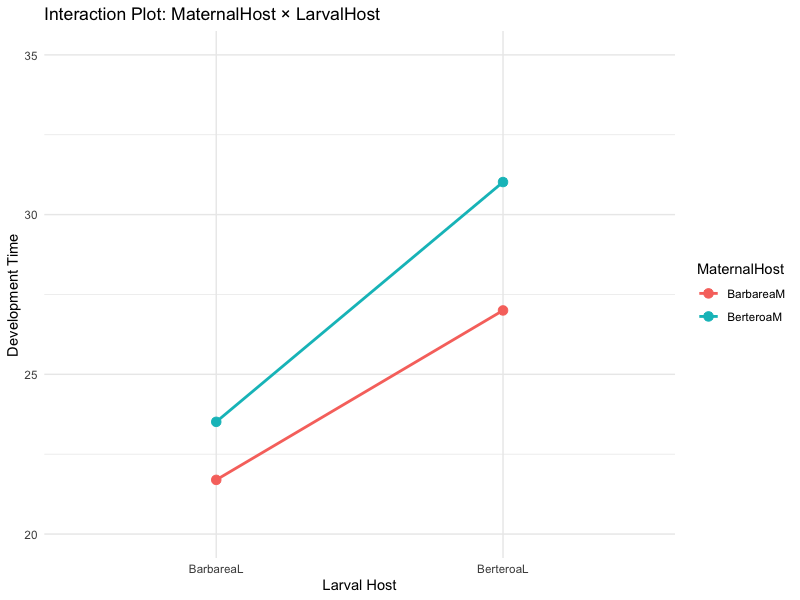

In [164]:
ggplot(dat, aes(x = LarvalHost, y = DevelopmentTime, color = MaternalHost, group = MaternalHost)) +
  stat_summary(fun = mean, geom = "line", size = 1) +
  stat_summary(fun = mean, geom = "point", size = 3) + 
  xlab("Larval Host") +
  ylab("Development Time") +
  coord_cartesian(ylim = c(20, 35)) +
  theme_minimal() +
  ggtitle("Interaction Plot: MaternalHost × LarvalHost")


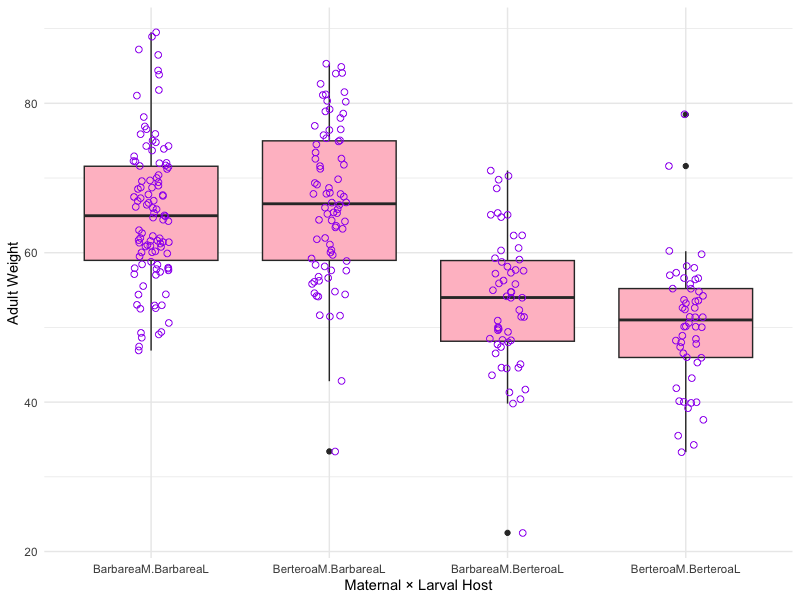

In [165]:
library(ggplot2)

set.seed(8)
ggplot(dat, aes(x=interaction(MaternalHost, LarvalHost), y=AdultWeight)) +
  geom_boxplot(fill="pink") +
  geom_jitter(width=0.1, shape=1, color="purple", size=2) +
  xlab("Maternal × Larval Host") +
  ylab("Adult Weight") +
  theme_minimal()

In [166]:
model_weight = lm(AdultWeight ~ LarvalHost * MaternalHost, data=dat)

anova(model_weight)

Analysis of Variance Table

Response: AdultWeight
                         Df  Sum Sq Mean Sq  F value Pr(>F)    
LarvalHost                1 13086.0 13086.0 145.6248 <2e-16 ***
MaternalHost              1     7.5     7.5   0.0833 0.7731    
LarvalHost:MaternalHost   1   336.7   336.7   3.7471 0.0539 .  
Residuals               283 25430.7    89.9                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [167]:
summary(model_weight)


Call:
lm(formula = AdultWeight ~ LarvalHost * MaternalHost, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.324  -6.214  -0.024   6.084  28.123 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                                65.3549     0.9386  69.629  < 2e-16 ***
LarvalHostBerteroaL                       -11.8513     1.5858  -7.473 9.81e-13 ***
MaternalHostBerteroaM                       1.3695     1.4259   0.960   0.3377    
LarvalHostBerteroaL:MaternalHostBerteroaM  -4.4962     2.3227  -1.936   0.0539 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.48 on 283 degrees of freedom
Multiple R-squared:  0.3456,	Adjusted R-squared:  0.3387 
F-statistic: 49.82 on 3 and 283 DF,  p-value: < 2.2e-16


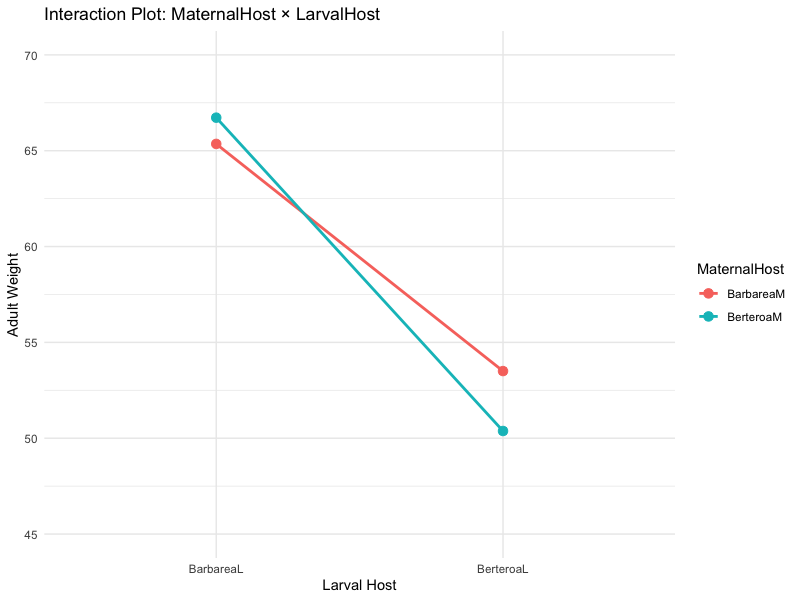

In [168]:
ggplot(dat, aes(x = LarvalHost, y = AdultWeight, color = MaternalHost, group = MaternalHost)) +
  stat_summary(fun = mean, geom = "line", size = 1) +
  stat_summary(fun = mean, geom = "point", size = 3) + 
  xlab("Larval Host") +
  ylab("Adult Weight") +
  coord_cartesian(ylim = c(45, 70)) +
  theme_minimal() +
  ggtitle("Interaction Plot: MaternalHost × LarvalHost")